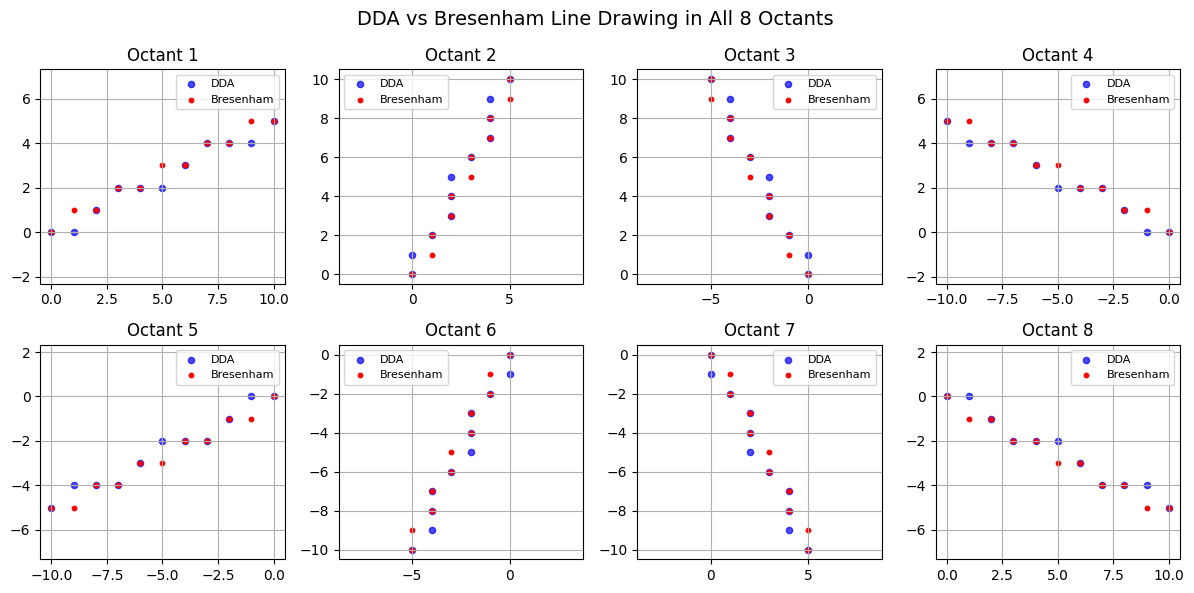

In [3]:
# LAB-2
# Q2: Draw lines for different octants and compare visually with DDA lines

import matplotlib.pyplot as plt

def dda_line(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    steps = int(max(abs(dx), abs(dy)))

    if steps == 0:
        return [x1], [y1]

    x_inc = dx / steps
    y_inc = dy / steps
    x, y = x1, y1
    xs, ys = [], []

    for _ in range(steps + 1):
        xs.append(round(x))
        ys.append(round(y))
        x += x_inc
        y += y_inc

    return xs, ys


def bresenham_line(x1, y1, x2, y2):
    xs, ys = [], []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    x, y = x1, y1

    if dx >= dy:
        p = 2 * dy - dx
        for _ in range(dx + 1):
            xs.append(x)
            ys.append(y)
            if p >= 0:
                y += sy
                p += 2 * (dy - dx)
            else:
                p += 2 * dy
            x += sx
    else:
        p = 2 * dx - dy
        for _ in range(dy + 1):
            xs.append(x)
            ys.append(y)
            if p >= 0:
                x += sx
                p += 2 * (dx - dy)
            else:
                p += 2 * dx
            y += sy

    return xs, ys


# Lines representing 8 octants
lines = [
    (0, 0, 10, 5),     # Octant 1
    (0, 0, 5, 10),     # Octant 2
    (0, 0, -5, 10),    # Octant 3
    (0, 0, -10, 5),    # Octant 4
    (0, 0, -10, -5),   # Octant 5
    (0, 0, -5, -10),   # Octant 6
    (0, 0, 5, -10),    # Octant 7
    (0, 0, 10, -5)     # Octant 8
]

plt.figure(figsize=(12, 6))

for i, (x1, y1, x2, y2) in enumerate(lines, 1):
    plt.subplot(2, 4, i)

    dx, dy = dda_line(x1, y1, x2, y2)
    bx, by = bresenham_line(x1, y1, x2, y2)

    plt.scatter(dx, dy, color='blue', s=20, label='DDA', alpha=0.7)
    plt.scatter(bx, by, color='red', s=10, label='Bresenham')

    plt.title(f"Octant {i}")
    plt.grid(True)
    plt.axis('equal')
    plt.legend(fontsize=8)

plt.suptitle("DDA vs Bresenham Line Drawing in All 8 Octants", fontsize=14)
plt.tight_layout()
plt.show()
